# MC1
## Aufgabe 1
Erstelle in einem Jupyter-Notebook ein Programm, welches eine «Lineare Regression» mittels des Gradientenverfahrens umsetzt. Es soll dabei der einfache Fall mit einer Inputvariablen (x) und einer Outputvariablen (y) umgesetzt werden und mit dem zur Verfügung gestellten Datensatz («data_a1_mc1_vta_hs25.csv») trainiert werden. Verwende als Fehlerfunktion den mittleren quadratischen Fehler und passe die Parameter (w_0, w_1) der linearen Regression (y=w_1*x+w_0) gemäss dem Gradienten mit einer Vernünftigen Lernrate (mue) während ca. 50 Epochen an.

Vergleiche die gefundenen Werte der Regression mit der analytischen Berechnung (siehe ala).

### Bib import

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Clean code

In [91]:
df = pd.read_csv("Data/data_a1_mc1_vta_hs25.csv", sep=";")
df.dropna(inplace=True)
df.head()

,x,y
0,0,-2.000
1,1,-1.595
2,2,-1.302
3,3,-1.103
4,4,-1.520


### 1. Plot

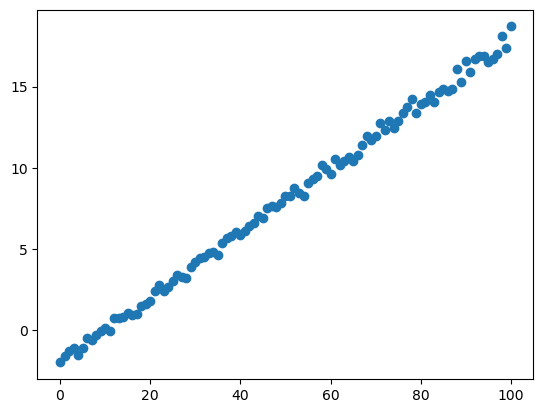

In [92]:
plt.scatter(y=df["y"], x=df["x"])
plt.show()

### Daten Reshape

In [93]:
x = df["x"].values.reshape(-1,1)
y = df["y"].values.reshape(-1,1)

### parameter initialisieren

In [94]:
w0, w1 = 0.0, 0.0
mue = 0.0001
epochs = 50

n = len(x)

### Gradient Descent Schleife

In [95]:
for epoch in range(epochs):
    y_pred = w1 * x + w0
    error = y - y_pred

    dw0 = -2/n * sum(error)
    dw1 = -2/n * sum(x * error)

    w0 -= mue * dw0
    w1 -= mue * dw1

    mse = (error**2).mean()
    print(f"Epoche {epoch+1}: MSE = {mse:.4f}")

Epoche 1: MSE = 97.8240
Epoche 2: MSE = 11.5784
Epoche 3: MSE = 2.1947
Epoche 4: MSE = 1.1736
Epoche 5: MSE = 1.0625
Epoche 6: MSE = 1.0503
Epoche 7: MSE = 1.0489
Epoche 8: MSE = 1.0486
Epoche 9: MSE = 1.0485
Epoche 10: MSE = 1.0484
Epoche 11: MSE = 1.0483
Epoche 12: MSE = 1.0482
Epoche 13: MSE = 1.0481
Epoche 14: MSE = 1.0480
Epoche 15: MSE = 1.0479
Epoche 16: MSE = 1.0478
Epoche 17: MSE = 1.0477
Epoche 18: MSE = 1.0476
Epoche 19: MSE = 1.0475
Epoche 20: MSE = 1.0474
Epoche 21: MSE = 1.0473
Epoche 22: MSE = 1.0473
Epoche 23: MSE = 1.0472
Epoche 24: MSE = 1.0471
Epoche 25: MSE = 1.0470
Epoche 26: MSE = 1.0469
Epoche 27: MSE = 1.0468
Epoche 28: MSE = 1.0467
Epoche 29: MSE = 1.0466
Epoche 30: MSE = 1.0465
Epoche 31: MSE = 1.0464
Epoche 32: MSE = 1.0463
Epoche 33: MSE = 1.0462
Epoche 34: MSE = 1.0461
Epoche 35: MSE = 1.0460
Epoche 36: MSE = 1.0459
Epoche 37: MSE = 1.0458
Epoche 38: MSE = 1.0457
Epoche 39: MSE = 1.0456
Epoche 40: MSE = 1.0455
Epoche 41: MSE = 1.0454
Epoche 42: MSE = 1.0453

### Lineare Regression

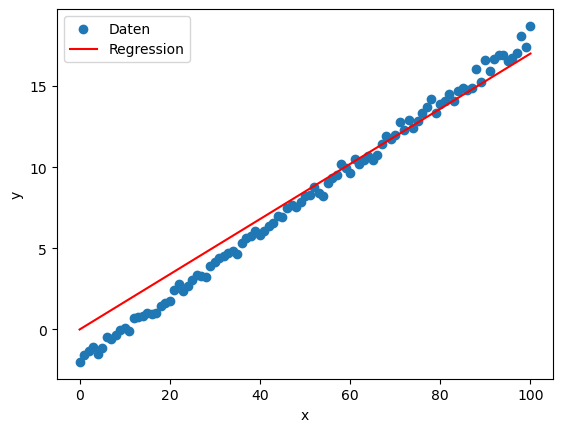

In [96]:
plt.scatter(x, y, label="Daten")
plt.plot(x, w1*x + w0, color='red', label="Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

### Gradientenfeld

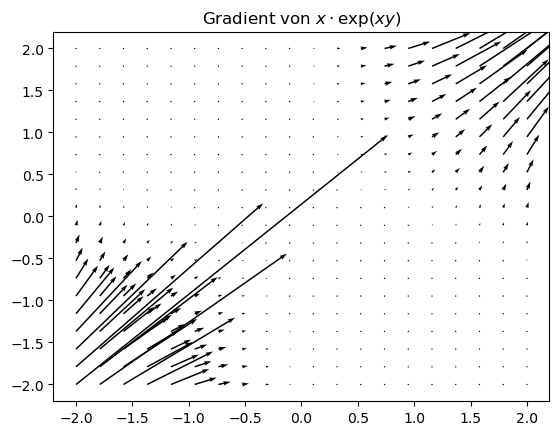

In [97]:
x_vals = np.linspace(-2, 2, 20)
y_vals = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x_vals, y_vals)
U = (1+X*Y)*np.exp(X*Y)
V = X*X*np.exp(X*Y)

fig1, ax1 = plt.subplots()
ax1.set_title(r'Gradient von $x\cdot \exp(xy)$')
Q = ax1.quiver(X,Y,U,V, units='width')
qk = ax1.quiverkey(Q,1,1,2,r'$2 \frac{m}{s}$',
                   labelpos='E', coordinates='figure')
plt.show()

### Analytische Berechnung mit der Normalengleichung

In [100]:
X = np.hstack((np.ones_like(x), x))
w_analytisch = np.linalg.inv(X.T @ X) @ X.T @ y

w0_analytisch = w_analytisch[0, 0]
w1_analytisch = w_analytisch[1, 0]

print(f"Analytische Lösung: w0 = {w0_analytisch:.4f}, w1 = {w1_analytisch:.4f}")
print(f"Gradient Descent:   w0 = {w0.item():.4f}, w1 = {w1.item():.4f}")


Analytische Lösung: w0 = -1.9454, w1 = 0.1990
Gradient Descent:   w0 = -0.0024, w1 = 0.1700


### Plot Gradient Descent vs. Normalengleichung

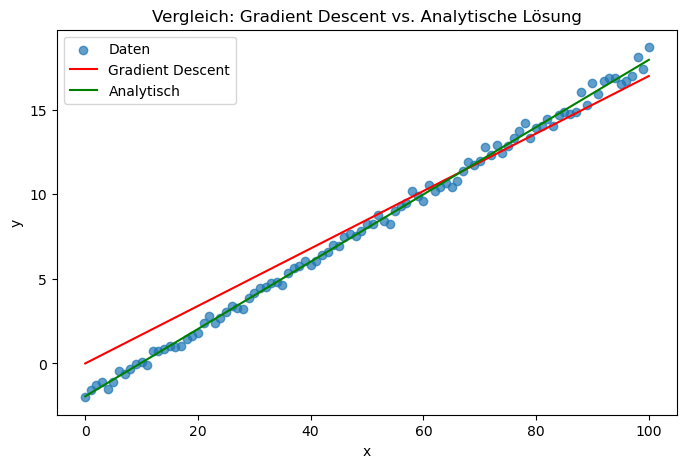

In [110]:
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label="Daten", alpha=0.7)
plt.plot(x, w1*x + w0, color='red', label="Gradient Descent")  # Linie vom Gradientenverfahren
plt.plot(x, w1_analytisch*x + w0_analytisch, color='green', label="Analytisch")  # analytische Linie
plt.xlabel("x")
plt.ylabel("y")
plt.title("Vergleich: Gradient Descent vs. Analytische Lösung")
plt.legend()
plt.show()